Name : Michael Julian Peter<br/>

### [15pt] Gaussian Filtering (a.k.a Blurring Effect)
In this section, you required to implement the blurring effect that we discussed in the class. You must use the Gaussian filter instead of standard blur filter. Please provide your own image. You can use numpy-scipy only implementation or opencv library implementation (preferred) for this assignment. You also need to display the image before and after the Gaussian filter is applied. As summary, if you want to get maximum score you must:
- Use Gaussian filter
- Display image before and after the Gaussian filtering proceess
- Try several different Sigma value on Gaussian filter parameter

Reference: 
- [OpenCV implementation] https://docs.opencv.org/3.4.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
- [Numpy-Scipy implementation] http://scipy-lectures.org/advanced/image_processing/#blurring-smoothing

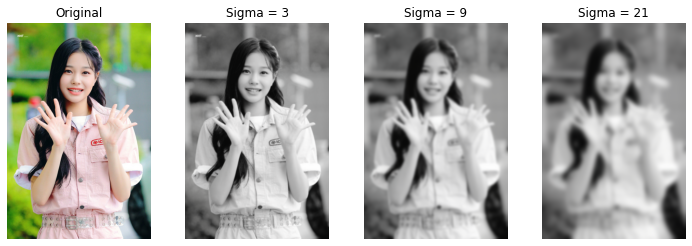

In [68]:
from matplotlib import pyplot as plt

# please provide your code here

#Berikut merupakana library yang digunakan untuk Blurring Effect
#Disini saya menggunakan ndimage yang terdapat pada scipy untung menggunakan gaussian filternya
import scipy.misc
from scipy import ndimage
import imageio

#saya menggunakan imageio untuk membaca gambar yang saya gunakan
img = imageio.imread('gambar.jpg')

#Berikut merupakan pengaplikasian gaussian filter menggunakan ndimage dari scipy, yang dimana saya menggunakan 3 angka sigma berbeda
dikit = ndimage.gaussian_filter(img, sigma=3)
lebih = ndimage.gaussian_filter(img, sigma=10)
banget =ndimage.gaussian_filter(img, sigma=20)

#code dibawah ini merupakan code untuk menampilkan gambar dari original dan setelah di beri filter
plt.figure(figsize=(10, 3))
plt.subplot(141)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(142)
plt.imshow(dikit, cmap=plt.cm.gray)
plt.title('Sigma = 3')
plt.axis('off')
plt.subplot(143)
plt.imshow(lebih, cmap=plt.cm.gray)
plt.title('Sigma = 9')
plt.axis('off')
plt.subplot(144)
plt.imshow(banget, cmap=plt.cm.gray)
plt.title('Sigma = 21')
plt.axis('off')

#berikut merupakan code untuk men-adjust subplot yang telah dibuat diatas
plt.subplots_adjust(wspace=0, hspace=0, top=1, bottom=0,left=0.01, right=1)

plt.show()

### [15pt] Pyramid Image Generation

In this assignment you need to implementing the pyramid image generation process, as we discussed in the class. Same as previous assignment, you can use either the scipy-numpy implementation or OpenCV implementation. If you want to get maximum score, you must
- Use color image instead of grayscale
- Show the original image
- Show the pyramid image 
- Try several different pyramid level

Reference:
- [OpenCV-Pyramid Image] https://docs.opencv.org/3.4.0/d4/d1f/tutorial_pyramids.html
- [Scipy-Numpy Pyramid Image] !No reference

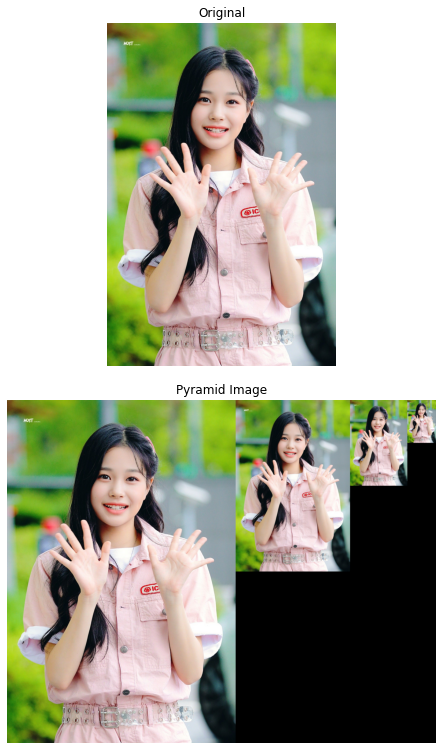

In [74]:
# please provide your code here

#library yang saya gunakan adalah sebagai berikut
import cv2
import matplotlib.pyplot as plt
import numpy as np

#disini saya menggunakan fungsi concat_images untuk menggabungkan 2 gambar yang berbeda ukuran
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3), dtype=np.uint8)
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img
#membaca image menggunakan cv2
img = cv2.imread("gambar.jpg")

#mengubah color agar warna tetap rgb pada cv2
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#disini saya menggunakan array untuk layer yang dimana layer pertama berisi gamabr asli
layer = [0]
layer[0] = RGB_img.copy()
output=layer[0]

#saya menggunakan fungsi for untuk setiap iterasi level pyramid dan menggunakan pyrDown() untuk mengubah size gambarnya
#disini kita dapat mengubah beberapa level pada fungsi for nya (disini saya ambil contoh 3)
for i in range(3):
    layer.append([0])
    layer[i+1] = cv2.pyrDown(layer[i])
    output = concat_images(output, layer[i+1])
    
#menampilkan hasil output
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(RGB_img)
plt.title('Original')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(output)
plt.title('Pyramid Image')
plt.axis('off')
    
#berikut merupakan code untuk men-adjust subplot yang telah dibuat diatas
plt.subplots_adjust(wspace=0, hspace=0.1, top=1, bottom=0,left=0, right=1)



### [35pt] Edge Detection

In this assignment, you need to implement several edge detection algorithm, including sobel edge detection, laplace edge detection, and canny edge detection. For this assignment, OpenCV provide more complete function for edge detection. If you want to get maximum score, you must:
- Implementing Canny Edge Detection
- Implementing Sobel Edge Detection
- Implementing Laplace Edge Detection
- Show the original image
- Show the image after edge detection process

Reference:
- [OpenCV-Canny Edge Detection] https://docs.opencv.org/4.0.1/dd/d1a/group__imgproc__feature.html
- [OpenCV-Laplace Filtering] https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6
- [OpenCV-Sobel Filtering] https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
- [Scipy-Numpy Sobel Edge Detection] http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_find_edges.html

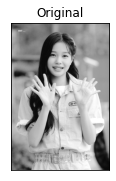

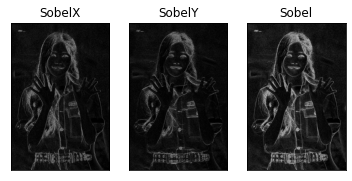

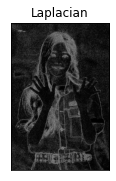

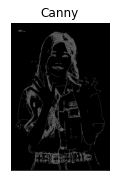

In [70]:
# please provide your code here
#library yang saya gunakan adalah sebagai berikut
import cv2
import numpy as np
from matplotlib import pyplot as plt

#mebaca file gambar.jpg
img = cv2.imread("gambar.jpg", cv2.IMREAD_GRAYSCALE)

#mengaplikasikan fungsi laplace dengan opencv
lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
lap = np.uint8(np.absolute(lap))

#mengaplikasikan fungsi sobel dengan opencv
sobelX = cv2.Sobel(img, cv2.CV_16S, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_16S, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

#menggabungkan sobelx dan sobely menjadi sobel
sobel = cv2.bitwise_or(sobelX, sobelY)

#mengaplikasikan fungsi canny dengan opencv
edges = cv2.Canny(img,100,200)

#Membuat array Judul dan gambar untuk mempermudah plot
titles = ['Original', 'Laplacian', 'SobelX', 'SobelY', 'Sobel', 'Canny']
images = [img, lap, sobelX, sobelY, sobel, edges]

#menampilkan Original image
plt.subplot(1, 3, 1), plt.imshow(images[0], 'gray')
plt.title(titles[0])
plt.xticks([]),plt.yticks([])
plt.show()

#menampilkan hasil sobel
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i+2], 'gray')
    plt.title(titles[i+2])
    plt.xticks([]),plt.yticks([])
plt.show()

#menampilkan hasil laplace
plt.subplot(1, 3, 1), plt.imshow(images[1], 'gray')
plt.title(titles[1])
plt.xticks([]),plt.yticks([])
plt.show()

#menampilkan hasil canny
plt.subplot(1, 3, 1), plt.imshow(images[5], 'gray')
plt.title(titles[5])
plt.xticks([]),plt.yticks([])
plt.show()

### [35pt] Corner Detection

In this assignment, you need to implement corner detection algorithm, including Harris corner detection and Shi-Thomas corner detection. If you want to get maximum score, you must:
- Implementing Harris corner detection algorithm
- Implementing Shi-Thomas corner detection algorithm
- Show the original image
- Show the features in the image using some mark

Reference:
- [OpenCV-Harris Corner Detection] https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
- [OpenCV-Shi Thomas Corner Detection] https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html

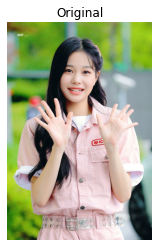

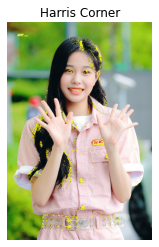

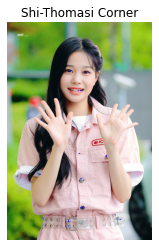

In [72]:
# please provide your code here
#library yang saya gunakan adalah sebagai berikut
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#membaca file gambar.jpg dengan cv2
img = cv.imread('gambar.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

#membuat copy untuk shi-thomasi corner
img2 = img.copy()
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

#menampilkan gambar original
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title('Original')
plt.axis('off')
plt.show()

#mengaplikasikan fungsi harris corner terhadap gambar gray
hrs = cv.cornerHarris(gray,2,3,0.04)

#melakukan dilasi untuk marking corner
hrs = cv.dilate(hrs,None)

#Threshold untuk nilai optimal, dapat bervariasi tergantung pada gambar (disini saya menggunakan warna kuning).
img[hrs>0.01*hrs.max()]=[0,255,255]

#mengubah warna menjadi RGB
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#menampilkan hasil harris corner
plt.imshow(RGB_img)
plt.title('Harris Corner')
plt.axis('off')
plt.show()

#mengaplikasikan fungsi Shi-Thomasi Corner terhadap gambar gray2
corners = cv.goodFeaturesToTrack(gray2,25,0.01,10)
corners = np.int0(corners)

#fungsi untuk marking corner (saya menggunakan linkaran)
for i in corners:
    x,y = i.ravel()
    cv.circle(img2,(x,y),5,255,-1)
    
#mengubah warna menjadi RGB
RGB_img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

#menampilkan hasil Shi-Thomasi Corner
plt.imshow(RGB_img2)
plt.title('Shi-Thomasi Corner')
plt.axis('off')
plt.show()